#Métodos de partición

[Documentación Scikit Learn](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)


##Dataset **Titanic**

In [101]:
import seaborn as sns
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


/var/folders/hh/g8ywcvk95090fh_vjlzqqq9h0000gn/T/ipykernel_21302/3161204690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.countplot(x='survived', data=df, palette="Reds")


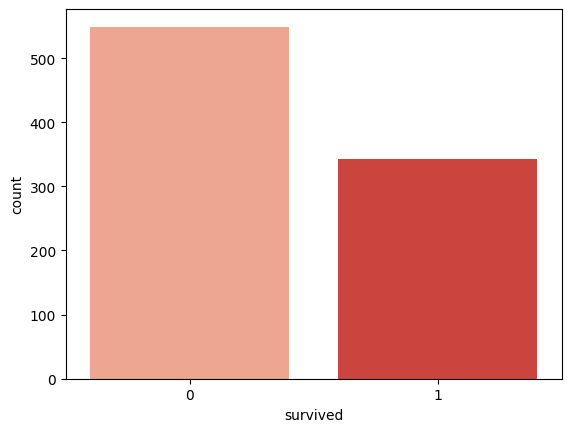

In [102]:
_ = sns.countplot(x='survived', data=df, palette="Reds")

##Partición en entrenamiento y testeo: *estratificación*

In [103]:
#Selección de features
X = df.loc[:, df.columns != "survived"]
y = df["survived"]

In [104]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [105]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [106]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import numpy as np

# Definir mapas de colores para las clases y las particiones
cmap_clases = ListedColormap(['#f4a59c', '#e94a4a'])  # Colores para clases
cmap_train_test = ListedColormap(['#85ee7e', '#7e9dee'])  # Colores para entrenamiento y testeo

def visualize_split(classes, groups, splits):
    fig, ax = plt.subplots(figsize=(10, 6))
    espaciado = list(range(splits, 0, -1))

    # Graficar las clases
    ax.scatter(range(len(classes)), [splits + 1.0] * len(classes), c=classes, marker='_', lw=25, cmap=cmap_clases)
    legend1 = plt.legend([Patch(color=cmap_clases(0.0)), Patch(color=cmap_clases(1.0))], ['Clase 0', 'Clase 1'], loc='upper right')

    if splits == 1:
        ax.scatter(range(len(groups)), [splits] * len(groups), c=groups, marker='_', lw=25, cmap=cmap_train_test)
        ax.set(yticks=[splits, splits + 1.0], yticklabels=['Entrenamiento/Testeo', 'Clases'], xlabel="Observaciones")
        ax.legend([Patch(color=cmap_train_test(0.0)), Patch(color=cmap_train_test(1.0))], ['Entrenamiento', 'Testeo'], loc='lower right')
        plt.gca().add_artist(legend1)

    elif splits == len(classes):
        for i in range(len(espaciado)):
            ax.scatter(range(len(groups[i])), [espaciado[i]] * len(groups[i]), c=groups[i], marker='_', lw=25, cmap=cmap_train_test)
        ax.legend([Patch(color=cmap_train_test(0.0)), Patch(color=cmap_train_test(1.0))], ['Entrenamiento', 'Testeo'], loc='lower right')
        plt.gca().add_artist(legend1)
        if splits < 11:
          ticklabels = [f'CV {x}' for x in reversed(espaciado)]
          ticklabels.append('Clases')
          espaciado.append(splits + 1)
          ax.set(yticks=espaciado, yticklabels=ticklabels, xlabel="Observaciones")

    else:
        for i in range(len(espaciado)):
            ax.scatter(range(len(groups[i])), [espaciado[i]] * len(groups[i]), c=groups[i], marker='_', lw=25, cmap=cmap_train_test)
        ax.legend([Patch(color=cmap_train_test(0.0)), Patch(color=cmap_train_test(1.0))], ['Entrenamiento', 'Testeo'], loc='lower right')
        plt.gca().add_artist(legend1)
        if splits < 11:
          ticklabels = [f'CV {x}' for x in reversed(espaciado)]
          ticklabels.append('Clases')
          espaciado.append(splits + 1)
          ax.set(ylim=[0, splits + 2], yticks=espaciado, yticklabels=ticklabels, xlabel="Observaciones")



    plt.title('Visualización de la Partición de Conjuntos')
    plt.show()

In [107]:
#Definición del % de datos que vamos a reservar para testeo
test_size = 0.20

#Definición de una semilla para garantizar la reproducibilidad de los resultados
random_state = 27

### A) Hold-out estratificado

> *train_test_split* (con parámetro stratify)



In [108]:
#Partición única en entrenamiento y testeo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state, stratify = y)

In [109]:
print('Datos de entrenamiento: ', X_train.shape, y_train.shape)
print('Datos de test: ',X_test.shape, y_test.shape)

Datos de entrenamiento:  (712, 14) (712,)
Datos de test:  (179, 14) (179,)


In [110]:
C1_train = (y_train).tolist().count(1)
C0_train = (y_train).tolist().count(0)
C1_test = (y_test).tolist().count(1)
C0_test = (y_test).tolist().count(0)

print(f"\nEn entrenamiento hay Clase_0: {C0_train} y Clase_1:{C1_train}")
print(f"En testeo hay Clase_0:{C0_test} y Clase_1:{C1_test}")


En entrenamiento hay Clase_0: 439 y Clase_1:273
En testeo hay Clase_0:110 y Clase_1:69


In [111]:
#Visualización de las clases y particiones
#Datos de clase
clases = y

#Datos de cantidad de particiones
n_split = 1

#Datos de la partición
grupos = np.zeros(y.shape)
for i in range(len(grupos)):
  if (i in range (0,len(X_train))):
    grupos[i]=0 #entrenamiento
  else:
    grupos[i]=1 #test

train_C0=0
train_C1=0
test_C0=0
test_C1=0
n= 0

for j in range(len(grupos)): #recorro la información de grupo de entrenamiento/test
    if (grupos[j]==0 and clases[j]==0):
      train_C0 = train_C0 + 1
    if (grupos[j]==0 and clases[j]==1):
      train_C1 = train_C1 + 1
    if (grupos[j]==1 and clases[j]==0):
      test_C0 = test_C0 + 1
    if (grupos[j]==1 and clases[j]==1):
      test_C1 = test_C1 + 1
    n +=1

print(f'Entrenamiento {train_C1/train_C0:3f} C1/C0 | Test {test_C1/test_C0:3f} C1/C0')

Entrenamiento 0.640553 C1/C0 | Test 0.556522 C1/C0


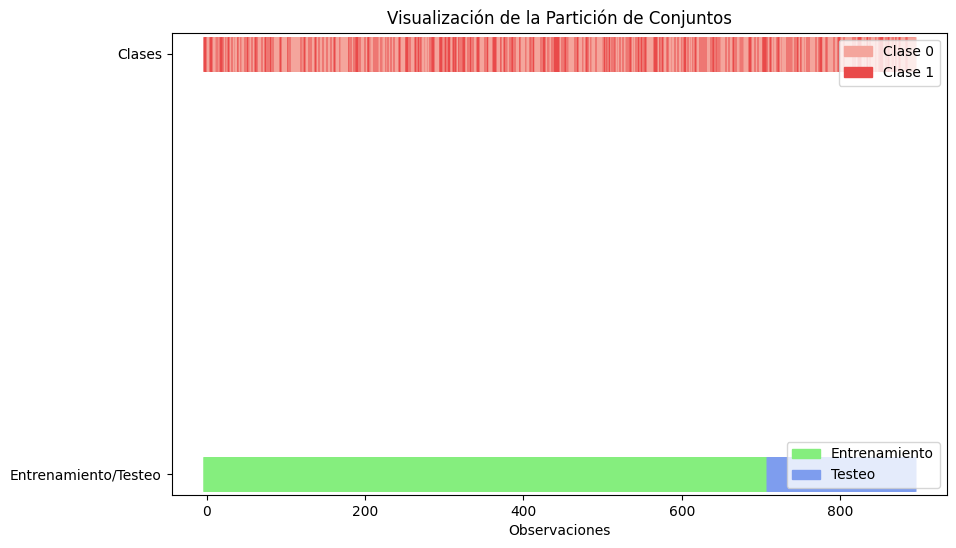

In [112]:
#Visualización
visualize_split(clases, grupos, n_split)

### B) Validación cruzada de Montecarlo estratificada

> *StratifiedShuffleSplit*

In [113]:
#Múltiples particiones independientes en entrenamiento y testeo

#Cantidad de veces que vamos a hacer la partición
nro_splits = 5

#Datos de clase
clases = y

from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit

sss = StratifiedShuffleSplit(n_splits=nro_splits, test_size = test_size, random_state=random_state)

In [114]:
grupos = []

#Datos de la partición
nro = 1
for train_index, test_index in sss.split(X,y):

    grupo = np.zeros(y.shape)
    for i in range(len(grupo)):
      if (i in train_index):
        grupo[i]=0 #el indice pertenece al conjunnto de entrenamiento
      else:
        grupo[i]=1  #el indice pertenece al conjunnto de test
    grupos.append(grupo)

    train_C0=0
    train_C1=0
    test_C0=0
    test_C1=0


    for j in range(len(grupo)): #recorro la información de grupo de entrenamiento/test
        if (grupo[j]==0 and clases[j]==0):
          train_C0 = train_C0 + 1
        if (grupo[j]==0 and clases[j]==1):
          train_C1 = train_C1 + 1
        if (grupo[j]==1 and clases[j]==0):
          test_C0 = test_C0 + 1
        if (grupo[j]==1 and clases[j]==1):
          test_C1 = test_C1 + 1

    print('CV %d: Entrenamiento %.2f C1/C0 | Test %.2f C1/C0' %(nro, train_C1/train_C0, test_C1/test_C0))
    nro = nro +1

CV 1: Entrenamiento 0.62 C1/C0 | Test 0.63 C1/C0
CV 2: Entrenamiento 0.62 C1/C0 | Test 0.63 C1/C0
CV 3: Entrenamiento 0.62 C1/C0 | Test 0.63 C1/C0
CV 4: Entrenamiento 0.62 C1/C0 | Test 0.63 C1/C0
CV 5: Entrenamiento 0.62 C1/C0 | Test 0.63 C1/C0


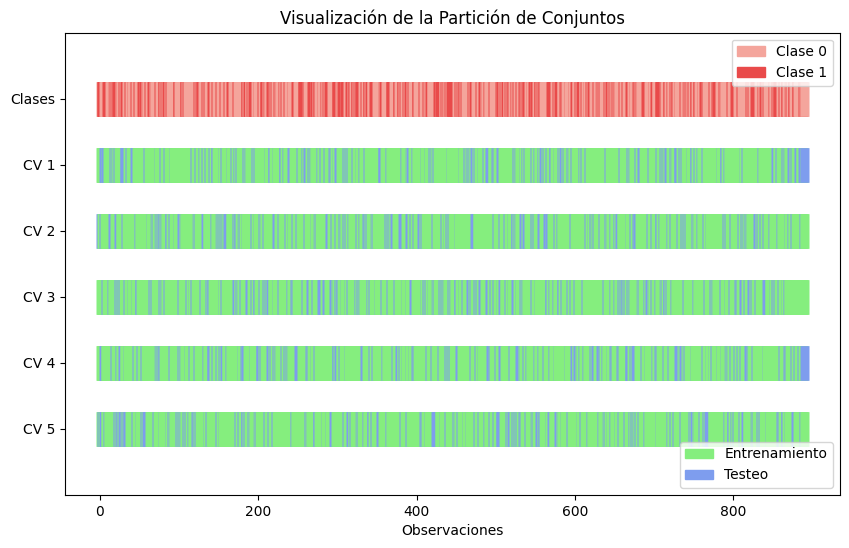

In [115]:
visualize_split(clases, grupos, nro_splits)

> *ShuffleSplit*

In [116]:
#Visualización de las clases y particiones
#Datos de clase
clases = y

ss = ShuffleSplit(n_splits=nro_splits, test_size=test_size, random_state=random_state)

In [117]:
grupos = []

#Datos de la partición
nro = 1
for train_index, test_index in ss.split(X,y):

    grupo = np.zeros(y.shape)
    for i in range(len(grupo)):
      if (i in train_index):
        grupo[i]=0
      else:
        grupo[i]=1

    grupos.append(grupo)

    train_C0=0
    train_C1=0
    test_C0=0
    test_C1=0


    for j in range(len(grupo)): #recorro la información de grupo de entrenamiento/test
        if (grupo[j]==0 and clases[j]==0):
          train_C0 = train_C0 + 1
        if (grupo[j]==0 and clases[j]==1):
          train_C1 = train_C1 + 1
        if (grupo[j]==1 and clases[j]==0):
          test_C0 = test_C0 + 1
        if (grupo[j]==1 and clases[j]==1):
          test_C1 = test_C1 + 1

    print('CV %d: Entrenamiento %.2f C1/C0 | Test %.2f C1/C0' %(nro, train_C1/train_C0, test_C1/test_C0))
    nro = nro +1

CV 1: Entrenamiento 0.63 C1/C0 | Test 0.60 C1/C0
CV 2: Entrenamiento 0.64 C1/C0 | Test 0.57 C1/C0
CV 3: Entrenamiento 0.61 C1/C0 | Test 0.69 C1/C0
CV 4: Entrenamiento 0.61 C1/C0 | Test 0.66 C1/C0
CV 5: Entrenamiento 0.63 C1/C0 | Test 0.60 C1/C0


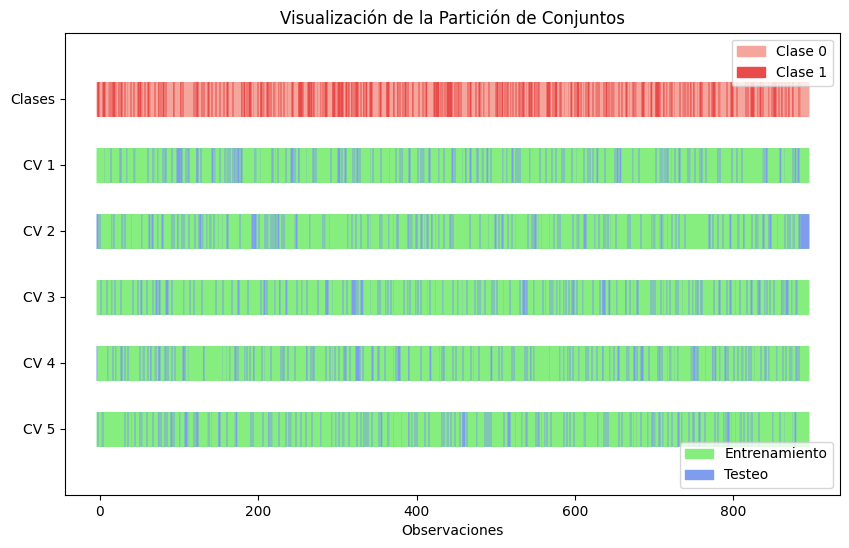

In [118]:
visualize_split(clases, grupos, nro_splits)

### C) Validación cruzada dejando uno afuera
> *LeaveOneOut* (al evaluar de a un ejemplo no requiere estratificación)


In [119]:
#Datos de clase
clases = y

from sklearn.model_selection import LeaveOneOut

#Datos de cantidad de particiones
nro_splits = len(y)

loo = LeaveOneOut()
grupos = []

#Datos de la partición
for train_index, test_index in loo.split(X):

    grupo = np.zeros(y.shape)
    for i in range(len(grupo)):
      if (i in train_index):
        grupo[i]=0
      else:
        grupo[i]=1

    grupos.append(grupo)

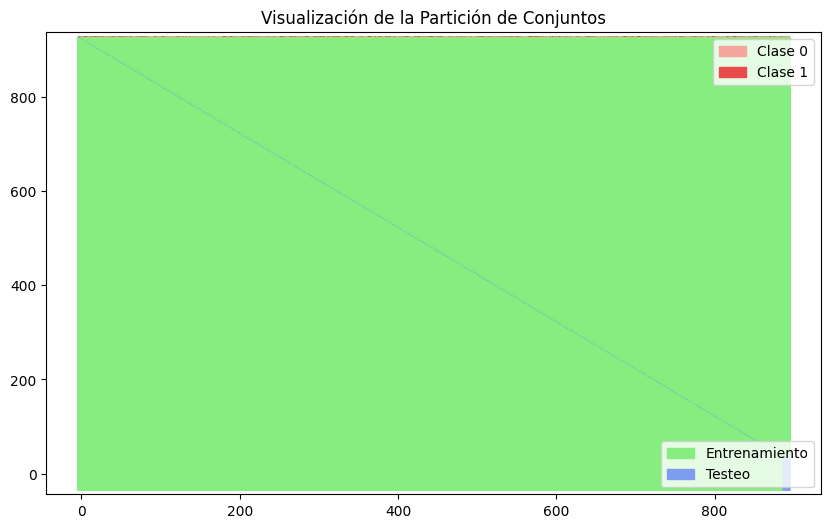

In [120]:
visualize_split(clases, grupos, nro_splits)

### D) Validación cruzada de K-particiones estratificada
> *StratifiedKFold*


In [121]:
#Cantidad de grupos y particiones que se van a realizar
nro_splits = 5

#Datos de clase
clases = y

from sklearn.model_selection import StratifiedKFold

#Datos de cantidad de particiones
skf = StratifiedKFold(n_splits=nro_splits)

In [122]:
grupos = []

#Datos de la partición
nro = 1
for train_index, test_index in skf.split(X,y):

    grupo = np.zeros(y.shape)
    for i in range(len(grupo)):
      if (i in train_index):
        grupo[i]=0
      else:
        grupo[i]=1

    grupos.append(grupo)

    train_C0=0
    train_C1=0
    test_C0=0
    test_C1=0


    for j in range(len(grupo)): #recorro la información de grupo de entrenamiento/test
        if (grupo[j]==0 and clases[j]==0):
          train_C0 = train_C0 + 1
        if (grupo[j]==0 and clases[j]==1):
          train_C1 = train_C1 + 1
        if (grupo[j]==1 and clases[j]==0):
          test_C0 = test_C0 + 1
        if (grupo[j]==1 and clases[j]==1):
          test_C1 = test_C1 + 1

    print('CV %d: Entrenamiento %.2f C1/C0 | Test %.2f C1/C0' %(nro, train_C1/train_C0, test_C1/test_C0))
    nro = nro +1

CV 1: Entrenamiento 0.62 C1/C0 | Test 0.63 C1/C0
CV 2: Entrenamiento 0.62 C1/C0 | Test 0.62 C1/C0
CV 3: Entrenamiento 0.62 C1/C0 | Test 0.62 C1/C0
CV 4: Entrenamiento 0.62 C1/C0 | Test 0.62 C1/C0
CV 5: Entrenamiento 0.62 C1/C0 | Test 0.63 C1/C0


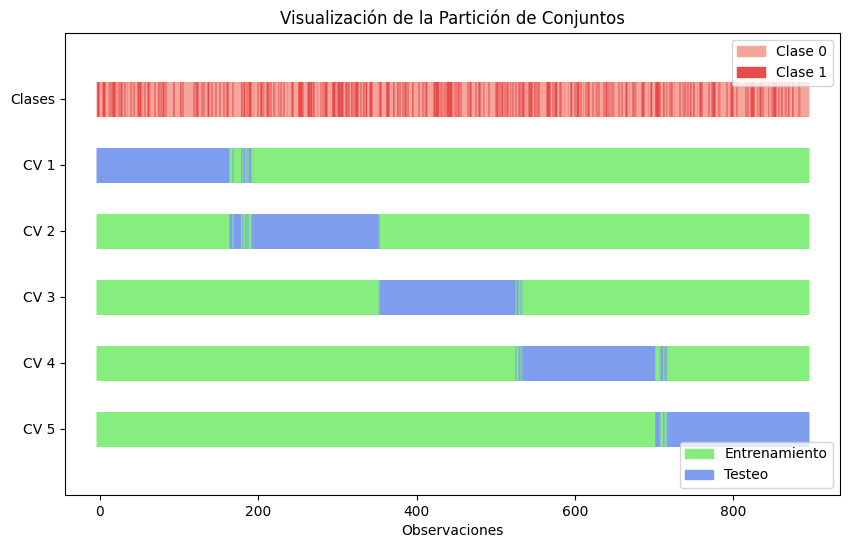

In [123]:
visualize_split(clases, grupos, nro_splits)

> *KFold*

In [124]:
#Datos de clase
clases = y

from sklearn.model_selection import KFold

#Datos de cantidad de particiones
kf = KFold(n_splits=nro_splits)

In [125]:
grupos = []

#Datos de la partición
nro = 1
for train_index, test_index in kf.split(X,y):

    grupo = np.zeros(y.shape)
    for i in range(len(grupo)):
      if (i in train_index):
        grupo[i]=0
      else:
        grupo[i]=1

    grupos.append(grupo)

    train_C0=0
    train_C1=0
    test_C0=0
    test_C1=0


    for j in range(len(grupo)): #recorro la información de grupo de entrenamiento/test
        if (grupo[j]==0 and clases[j]==0):
          train_C0 = train_C0 + 1
        if (grupo[j]==0 and clases[j]==1):
          train_C1 = train_C1 + 1
        if (grupo[j]==1 and clases[j]==0):
          test_C0 = test_C0 + 1
        if (grupo[j]==1 and clases[j]==1):
          test_C1 = test_C1 + 1

    print('CV %d: Entrenamiento %.2f C1/C0 | Test %.2f C1/C0' %(nro, train_C1/train_C0, test_C1/test_C0))
    nro = nro +1

CV 1: Entrenamiento 0.66 C1/C0 | Test 0.49 C1/C0
CV 2: Entrenamiento 0.58 C1/C0 | Test 0.80 C1/C0
CV 3: Entrenamiento 0.62 C1/C0 | Test 0.63 C1/C0
CV 4: Entrenamiento 0.61 C1/C0 | Test 0.68 C1/C0
CV 5: Entrenamiento 0.64 C1/C0 | Test 0.55 C1/C0


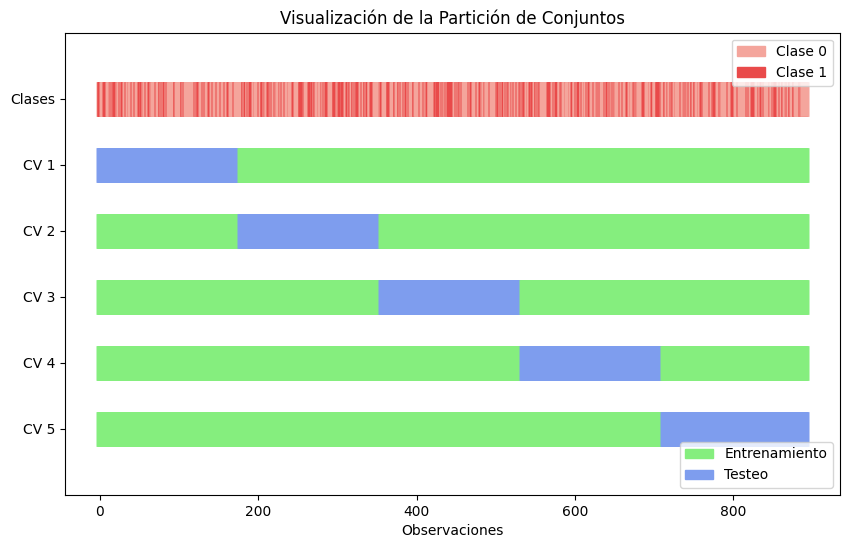

In [126]:
visualize_split(clases, grupos, nro_splits)

#Métricas

A partir de esto podemos definir:

**Error de Clasificación** = FP + FN / (VP+VN+FN+FP) = P(pred=1|gt=0) and P(pred=0|gt=1)

**Exactitud (*accuracy*)** = VP + VN / (VP+VN+FN+FP) = P(pred=1|gt=1) and P(pred=0|gt=0)

**Sensibilidad** = recall = TPR = VP / (VP+FN) = P(pred=1|gt=1)

**Especificidad** = TNR = VN / (VN+FP) = P(pred=0|gt=0)

**Precisión** = VPP = VP / (VP+FP)

**VPN** = VPN = VN / (VN+FN)

###Configuración inicial

In [127]:
import numpy as np

###Generación de datos aleatorios

In [128]:
np.random.seed(42)
n_samples = 1000  # Número de muestras

# Generar vectores aleatorios para y_true y probabilidades predichas
y_true = np.random.randint(0, 2, size=n_samples)  # Valores verdaderos binarios
y_prob = np.random.uniform(0,1,n_samples)  # Probabilidades predichas aleatorias

In [129]:
# Convertir probabilidades en predicciones binarias usando un umbral
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# Mostrar las primeras filas de los vectores generados
print("y_true:", y_true[:10])
print("y_prob:", y_prob[:10])
print("y_pred:", y_pred[:10])


y_true: [0 1 0 0 0 1 0 0 0 1]
y_prob: [0.69816171 0.53609637 0.30952762 0.81379502 0.68473117 0.16261694
 0.91092718 0.82253724 0.94979991 0.72571951]
y_pred: [1 1 0 1 1 0 1 1 1 1]


###Métricas de clasificación

####Por fórmula

In [130]:
# Error de clasificación
predicciones_incorrectas = np.sum(y_true != y_pred)
muestras_totales = len(y_true)
error = predicciones_incorrectas / muestras_totales
error

np.float64(0.492)

In [131]:
# Exactitud
predicciones_correctas = np.sum(y_true == y_pred)
muestras_totales = len(y_true)
exactitud = predicciones_correctas / muestras_totales
exactitud

np.float64(0.508)

In [132]:
error + exactitud

np.float64(1.0)

####Scikit-Learn

[Documentación Scikit Learn](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [133]:
from sklearn import metrics

In [134]:
f1 = metrics.f1_score(y_true, y_pred)
print("F1 Score:", f1)

F1 Score: 0.5128712871287129


###Matriz de Confusión

In [135]:
conf_matrix = metrics.confusion_matrix(y_true, y_pred)
conf_matrix

array([[249, 241],
       [251, 259]])

In [136]:
#Definir los nombres de las clases
class_names = ["Clase_0", "Clase_1"]

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))

# Añadir etiquetas y título

# Mostrar el gráfico
plt.show()

<Figure size 800x600 with 0 Axes>

###Curvas ROC Y PR

#Algoritmos de clasificación (I)

##Dataset

[Documentación Scikit Learn](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

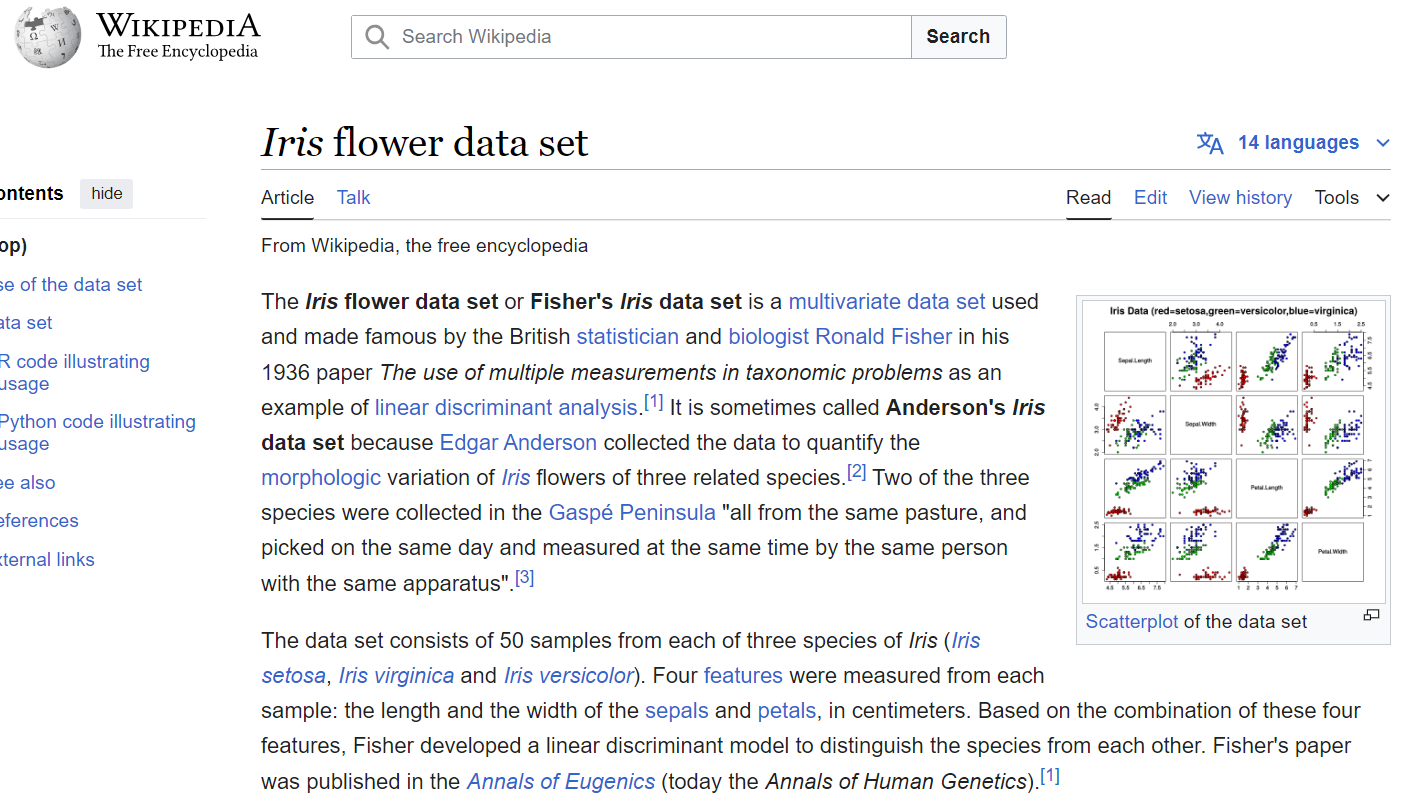

###  (1) Entender el problema

In [137]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [138]:
# Cargar el dataset Iris
iris = load_iris()

#Transormar a dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Añadir la columna de la clase al DataFrame
iris_df['species'] = iris.target

# Mapear los valores numéricos de la clase a nombres de especies
iris_df['named_species'] = iris_df['species'].map({i: species for i, species in enumerate(iris.target_names)})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,named_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [139]:
iris_df.named_species.unique()

array([np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')],
      dtype=object)

/var/folders/hh/g8ywcvk95090fh_vjlzqqq9h0000gn/T/ipykernel_21302/2764968032.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='species', y='count', data=counts, palette='coolwarm')


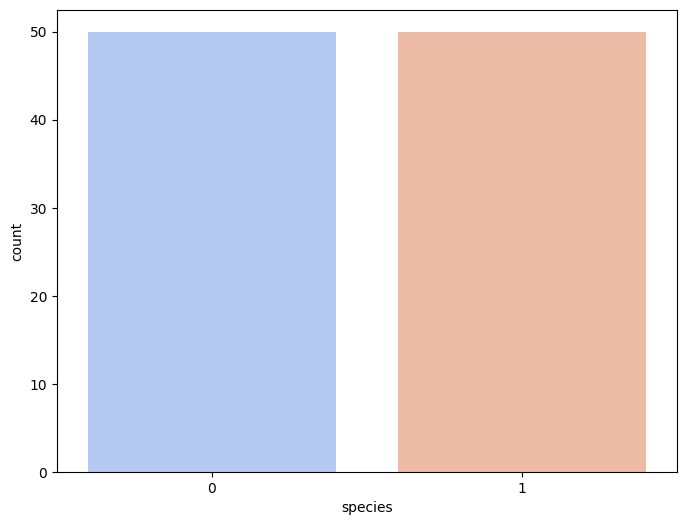

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Ocurrencias por especie
counts = iris_df['species'].value_counts().reset_index()
counts.columns = ['species', 'count']

#Me quedo con las dos primeras clases
counts = counts[counts.species !=2]

# Crear el barplot con Seaborn
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='species', y='count', data=counts, palette='coolwarm')


In [141]:
X = iris_df.values[:, :2]  # Usar solo las dos primeras características
y = iris_df.species

In [142]:
X.shape, y.shape

((150, 2), (150,))

In [143]:
# Filtrar solo dos clases para clasificación binaria
X, y = X[y != 2], y[y != 2]
X.shape, y.shape

((100, 2), (100,))

###  (2) Conformar el set de datos
*Transformar los datos, generar las particiones, seleccionar las características, etc...*

In [144]:
# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [145]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0, stratify = y)

In [146]:
X_train

array([[-1.11201292e-01,  6.31902691e-01],
       [ 8.28527933e-01, -4.17769553e-01],
       [-7.37687441e-01,  6.31902691e-01],
       [ 1.29839254e+00, -1.67737625e+00],
       [-5.81065904e-01,  8.41837140e-01],
       [-4.24444366e-01,  8.41837140e-01],
       [ 1.45501408e+00, -4.17769553e-01],
       [-7.37687441e-01, -2.30717959e+00],
       [-7.37687441e-01,  4.21968242e-01],
       [-7.37687441e-01,  6.31902691e-01],
       [-1.20755205e+00,  2.12033793e-01],
       [-7.37687441e-01, -2.07835104e-01],
       [ 1.29839254e+00,  4.21968242e-01],
       [-1.83403820e+00, -2.07835104e-01],
       [-8.94308978e-01, -1.46744180e+00],
       [ 9.85149470e-01, -6.27704002e-01],
       [ 3.58663321e-01, -1.04757290e+00],
       [-1.11201292e-01,  6.31902691e-01],
       [ 2.02041783e-01, -8.37638451e-01],
       [-7.37687441e-01,  8.41837140e-01],
       [ 9.85149470e-01, -2.07835104e-01],
       [ 1.29839254e+00, -1.25750735e+00],
       [-1.11201292e-01, -2.07835104e-01],
       [ 3.

In [147]:
X_train.shape, X_test.shape

((70, 2), (30, 2))

In [148]:
y_train.value_counts()

species
0    35
1    35
Name: count, dtype: int64

In [149]:
y_test.value_counts()

species
1    15
0    15
Name: count, dtype: int64

##Naïve Bayes

###  (3) Ajustar el modelo

In [150]:
from sklearn.naive_bayes import GaussianNB
# Entrenar el clasificador Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

###  (5) Evaluar el modelo

In [151]:
# Predicciones
y_pred = nb.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1])

In [152]:
y_proba = nb.predict_proba(X_test)
y_proba

array([[2.76050809e-02, 9.72394919e-01],
       [9.87757908e-01, 1.22420923e-02],
       [9.93116192e-01, 6.88380793e-03],
       [3.93454045e-04, 9.99606546e-01],
       [3.21796538e-01, 6.78203462e-01],
       [9.89164339e-01, 1.08356610e-02],
       [5.12231870e-02, 9.48776813e-01],
       [9.99157810e-01, 8.42190367e-04],
       [6.84141469e-02, 9.31585853e-01],
       [6.44993533e-02, 9.35500647e-01],
       [9.99157810e-01, 8.42190367e-04],
       [9.40311437e-01, 5.96885634e-02],
       [9.97824540e-01, 2.17546050e-03],
       [9.73483214e-01, 2.65167857e-02],
       [7.05506829e-04, 9.99294493e-01],
       [3.93454045e-04, 9.99606546e-01],
       [9.46340191e-01, 5.36598085e-02],
       [8.70692860e-01, 1.29307140e-01],
       [9.00579392e-01, 9.94206076e-02],
       [9.97183677e-01, 2.81632298e-03],
       [7.62770967e-03, 9.92372290e-01],
       [5.36948686e-05, 9.99946305e-01],
       [9.99157810e-01, 8.42190367e-04],
       [4.12276093e-04, 9.99587724e-01],
       [6.841414

In [153]:
from sklearn.metrics import accuracy_score, recall_score

accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

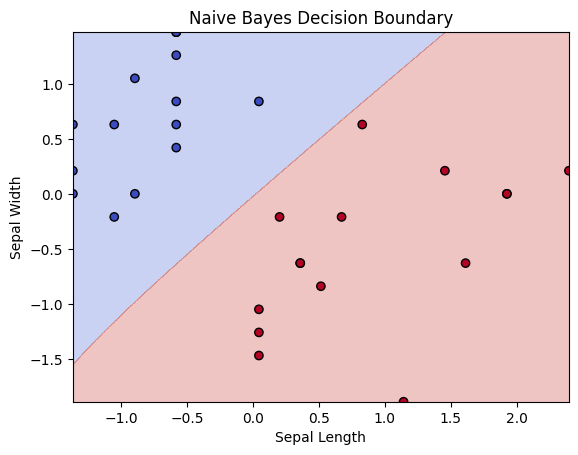

In [154]:
# Visualización de fronteras de decisión
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 1000),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 1000))
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Naive Bayes Decision Boundary')
plt.show()

##Análisis Discriminante Lineal

###  (4) Ajustar el modelo

In [155]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Entrenar el clasificador LDA
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [156]:
help(lda)

Help on LinearDiscriminantAnalysis in module sklearn.discriminant_analysis object:

class LinearDiscriminantAnalysis(sklearn.base.ClassNamePrefixFeaturesOutMixin, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)
 |  
 |  Linear Discriminant Analysis.
 |  
 |  A classifier with a linear decision boundary, generated by fitting class
 |  conditional densities to the data and using Bayes' rule.
 |  
 |  The model fits a Gaussian density to each class, assuming that all classes
 |  share the same covariance matrix.
 |  
 |  The fitted model can also be used to reduce the dimensionality of the input
 |  by projecting it to the most discriminative directions, using the
 |  `transform` method.
 |  
 |  .. versionadded:: 0.17
 |  
 |  For a comparison between
 |  :class:`~sklearn.di

In [157]:
lda.coef_, lda.intercept_

(array([[ 6.86536847, -6.42864576]]), array([-0.12670187]))

In [158]:
lda.means_

array([[-0.69741333,  0.67988771],
       [ 0.65400679, -0.76566093]])

###  (5) Evaluar el modelo

In [159]:
# Predicciones
y_pred = lda.predict(X_test)
print(f'LDA Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

LDA Accuracy: 1.0


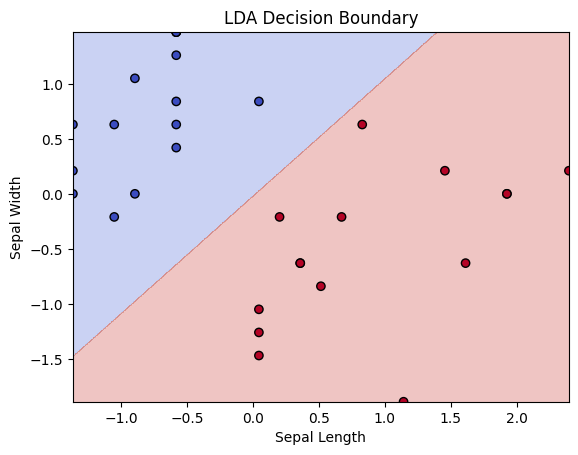

In [160]:
# Visualización de fronteras de decisión
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 1000),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 1000))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('LDA Decision Boundary')
plt.show()


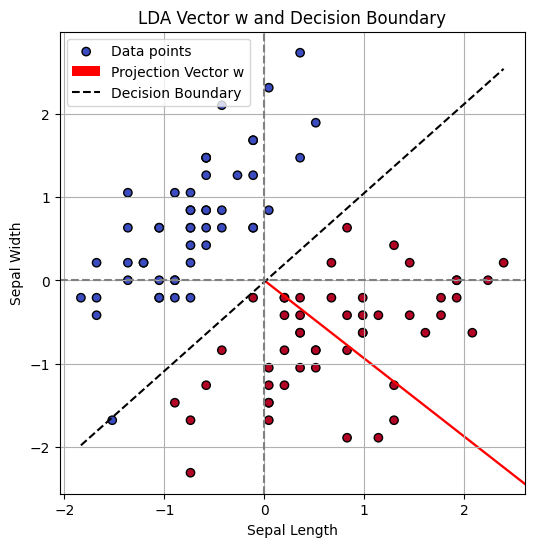

In [161]:
# Obtener el vector de proyección w
w = lda.coef_[0]
intercept = lda.intercept_[0]

# Crear una visualización del vector de proyección y la frontera de decisión
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap='coolwarm', label='Data points')

# Extender el vector de proyección w
origin = np.mean(X_scaled, axis=0)
x_values = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 2)
y_values = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 2)
line_x = np.array([X_scaled[:, 0].min(), X_scaled[:, 0].max()])
line_y = origin[1] + (line_x - origin[0]) * (w[1] / w[0])

plt.quiver(origin[0], origin[1], w[0], w[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label='Projection Vector w')

# Calcular y trazar la frontera de decisión
x_range = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)
decision_boundary = -(lda.coef_[0, 0] * x_range + lda.intercept_[0]) / lda.coef_[0, 1]
plt.plot(x_range, decision_boundary, 'k--', label='Decision Boundary')

# Configuración del gráfico
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('LDA Vector w and Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


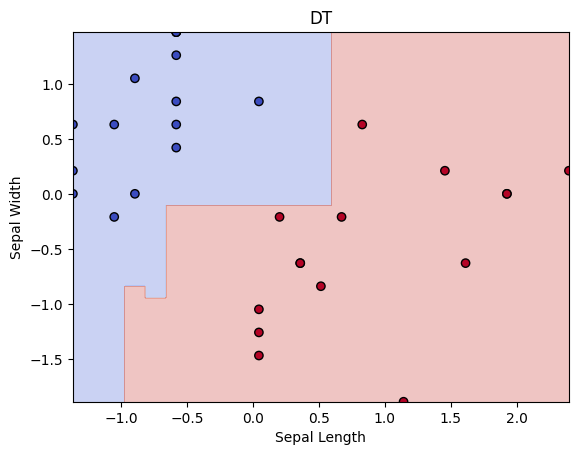

In [163]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el clasificador Decision Tree

dt = DecisionTreeClassifier(random_state=0)
dt = dt.fit(X_train, y_train)

# Predicciones

y_pred = dt.predict(X_test)

# Visualización de fronteras de decisión
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 1000),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 1000))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DT')
plt.show()

In [167]:
import graphviz
from sklearn import tree

# Visualizar el árbol de decisión
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=iris.feature_names[0:2], #porque estamos usando solo dos características
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree", format='png', cleanup=True)
graph.view("iris_tree")
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH